In [13]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import ptitprince as pt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [14]:
plot_info = []

for root, sub_dir, files in os.walk("../utils/gen_within_100"):
    for file in files:
        if file.endswith(".csv"):
            try:
                src_file = os.path.join(root,file)
                dim = int(file[3])
                obj = int(file[9])
                tree = file[16:].strip(".csv")
                df = pd.read_csv(src_file,index_col=0).fillna(0)
                df["dimension"] = dim
                df["n_objectives"] = obj
                df["tree"] = tree
                df[""]
                plot_info.append(df)
            except Exception as e:
                pass


In [15]:
new_df = pd.concat(plot_info,ignore_index=True)

In [16]:
new_df

,solver,exp_index,root,node_1,node_2,node_3,node_4,dimension,n_objectives,tree
0,MOEAD,67870.0,97.0,0.0,1.0,2.0,0.0,2,5,breadth
1,MOEAD,67871.0,98.0,0.0,1.0,0.0,1.0,2,5,breadth
2,MOEAD,67872.0,93.0,1.0,2.0,2.0,2.0,2,5,breadth
3,MOEAD,67873.0,98.0,0.0,1.0,1.0,0.0,2,5,breadth
4,MOEAD,67874.0,95.0,0.0,1.0,1.0,3.0,2,5,breadth
...,...,...,...,...,...,...,...,...,...,...
76871,IBEA,89783.0,22.0,78.0,0.0,0.0,0.0,5,2,breadth
76872,IBEA,89784.0,14.0,0.0,0.0,0.0,86.0,5,2,breadth
76873,IBEA,89785.0,15.0,0.0,0.0,85.0,0.0,5,2,breadth
76874,IBEA,89786.0,15.0,85.0,0.0,0.0,0.0,5,2,breadth


In [29]:
solver = "NSGAII"
dim_n_obj_combs = [(4,3),(3,4),(2,5)]
tree = "diverse_tree"
shift_dim = False
if shift_dim:
    filtered_dfs = []
    for dim_n_obj_comb in dim_n_obj_combs:
        dimension = dim_n_obj_comb[0]
        n_objectives = dim_n_obj_comb[1]
        filtered_dfs.append(
            new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)&(new_df["n_objectives"]==n_objectives)]
        )
    filtered_df = pd.concat(filtered_dfs)
else:
    dimension = 2
    n_objectives = [2, 3,4,5]
    filtered_df = new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)]

In [30]:
filtered_df

,solver,exp_index,root,node_1,node_2,node_3,node_4,dimension,n_objectives,tree
11712,NSGAII,37551.0,100.0,0.0,0.0,0.0,0.0,2,3,diverse_tree
11713,NSGAII,37552.0,100.0,0.0,0.0,0.0,0.0,2,3,diverse_tree
11714,NSGAII,37553.0,100.0,0.0,0.0,0.0,0.0,2,3,diverse_tree
11715,NSGAII,37554.0,100.0,0.0,0.0,0.0,0.0,2,3,diverse_tree
11716,NSGAII,37555.0,97.0,1.0,0.0,2.0,0.0,2,3,diverse_tree
...,...,...,...,...,...,...,...,...,...,...
56147,NSGAII,78683.0,99.0,1.0,0.0,0.0,0.0,2,4,diverse_tree
56148,NSGAII,78684.0,100.0,0.0,0.0,0.0,0.0,2,4,diverse_tree
56149,NSGAII,78685.0,100.0,0.0,0.0,0.0,0.0,2,4,diverse_tree
56150,NSGAII,78686.0,98.0,2.0,0.0,0.0,0.0,2,4,diverse_tree


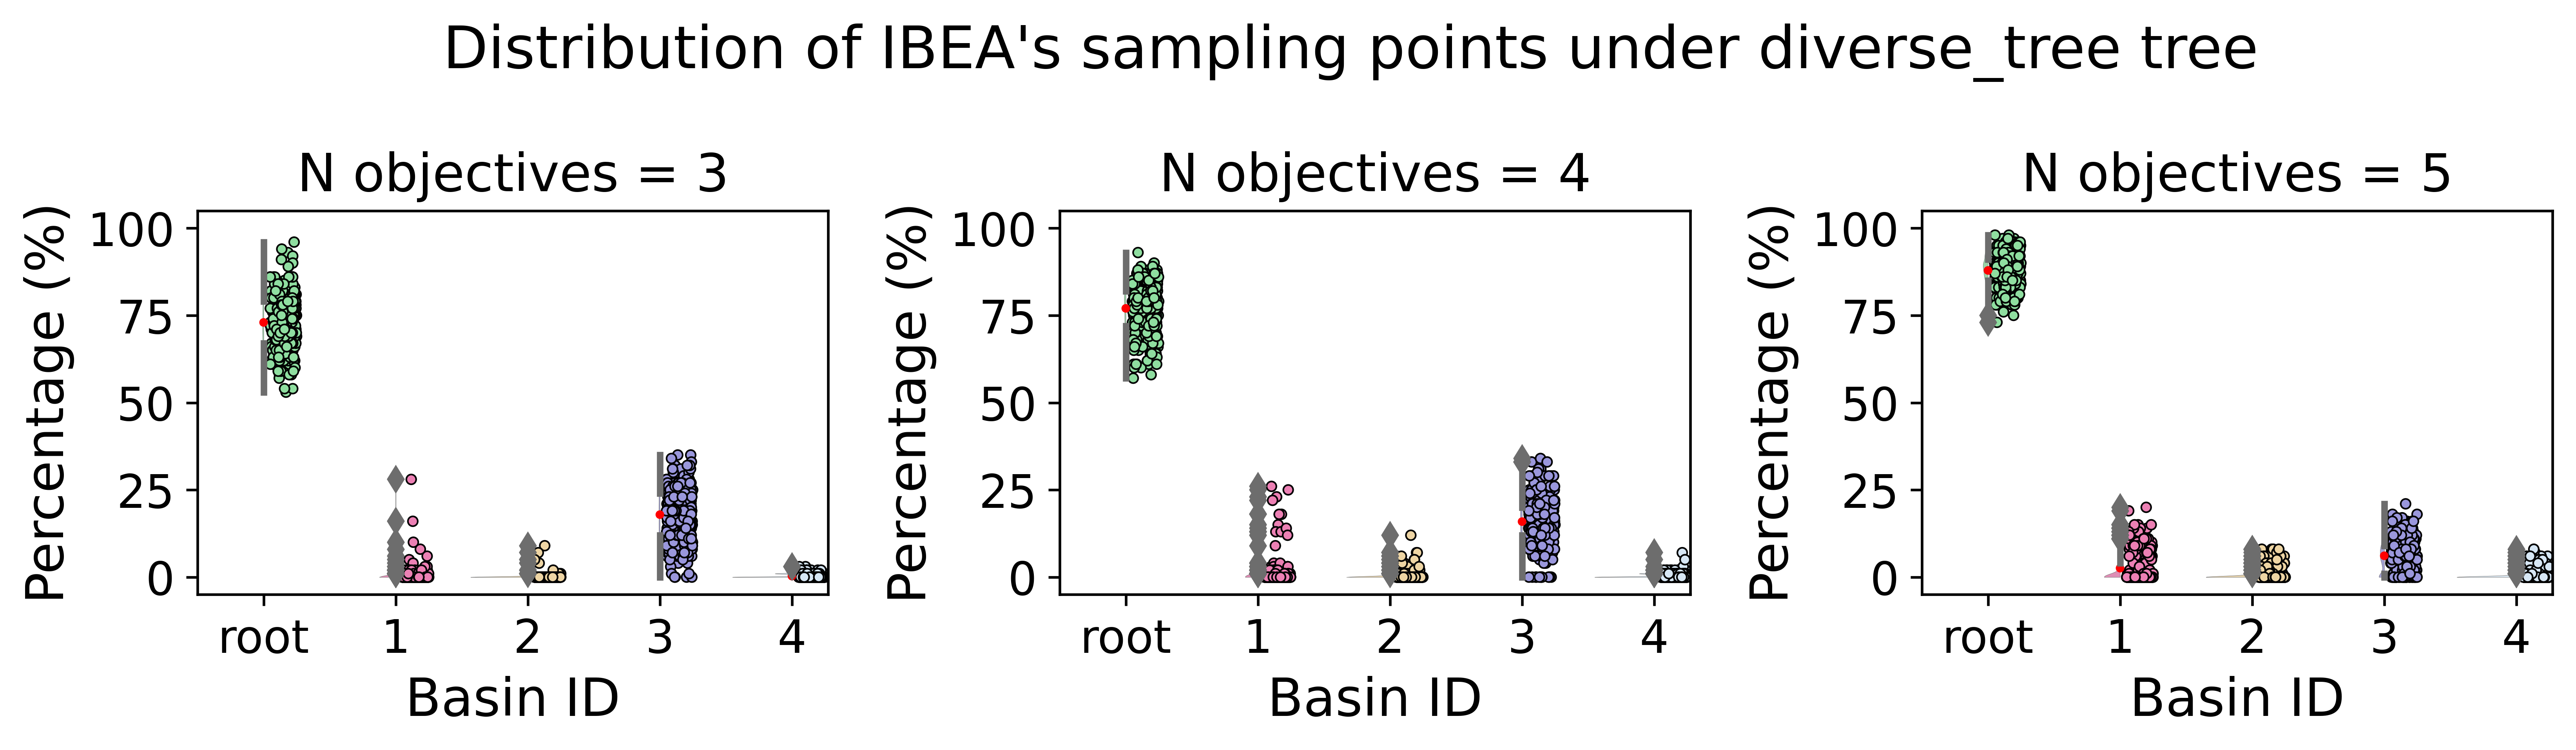

In [21]:
if solver == "MOEAD":
    solver = "MOEA/D"
if solver == "NSGAII":
    solver = "NSGA-II"

fig, axs = plt.subplots(1, 3, figsize=(11, 3),dpi=600)
fig.suptitle(f"Distribution of {solver}'s sampling points under {tree} tree",fontsize=18)
fig.tight_layout(pad=2,w_pad=4,h_pad=5)
width = 0.6
colors = ["#8fdea0","#ec80b4", "#eed5a4","#9a97dc","#d7e7f5"]
palette = sns.color_palette(colors)

for n_objective, sub_df in filtered_df.groupby("n_objectives"):
    sub_results = []
    for sub_index, row in sub_df.iterrows():
        sub_results.append({"node_name": "root", "percentage": row["root"]})
        sub_results.append({"node_name": "1", "percentage": row["node_1"]})
        sub_results.append({"node_name": "2", "percentage": row["node_2"]})
        sub_results.append({"node_name": "3", "percentage": row["node_3"]})
        sub_results.append({"node_name": "4", "percentage": row["node_4"]})
    sub_results = pd.DataFrame(sub_results)
    plt.subplot(1,3,n_objective-2)
    plt.title(f"N objectives = {n_objective}", fontsize=16)
    # pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
    # axs[plot_row,plot_col].set_xlabel("Basin name")
    # axs[plot_row,plot_col].set_ylabel("Percentage of solver instances")
    # axs[plot_row,plot_col].set_ylim([-5, 105])

    plt.ylim([-5,105])
    # plt.grid(visible=False)
    pt.RainCloud(data=sub_results, x="node_name", y="percentage", orient="v", width_viol=0.9,linewidth=0.1,point_size=3,
             rain_edgecolor='black', rain_linewidth=0.5, rain_alpha=1,move = 0.15,width_box=0,box_linewidth=0,offset=-0.0,pointplot=True, point_linestyles='', point_scale=0.3, palette=palette)
    plt.xlabel("Basin ID", fontsize=16)
    plt.ylabel("Percentage (%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.savefig(f"{solver}_{tree}{'_shifted' if shift_dim else ''}.pdf", format="pdf", bbox_inches="tight")
plt.savefig(f"{solver}_{tree}{'_shifted' if shift_dim else ''}.png")




In [22]:
dim_n_obj_combs = []
for i in range(2,6):
    for j in range(2,6):
        dim_n_obj_combs.append((i,j))
print(dim_n_obj_combs)

[(2, 2), (2, 3), (2, 4), (2, 5), (3, 2), (3, 3), (3, 4), (3, 5), (4, 2), (4, 3), (4, 4), (4, 5), (5, 2), (5, 3), (5, 4), (5, 5)]


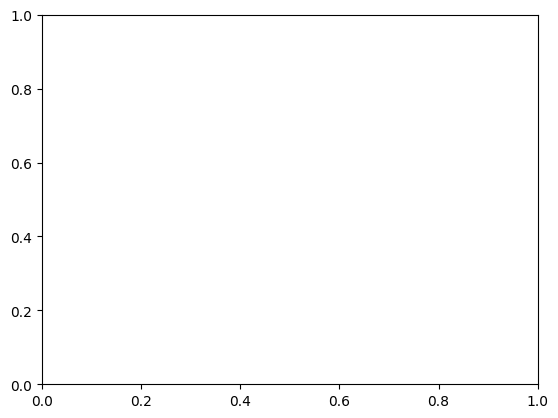

In [23]:
# Mass plot
for solver in ["GDE3", "NSGAII","IBEA", "MOEAD"]:
    for tree in ["breadth", "depth", "diverse_tree"]:
        for dimension in [2,3,4,5]:
            shift_dim = False
            if shift_dim:
                filtered_dfs = []
                for dim_n_obj_comb in dim_n_obj_combs:
                    dimension = dim_n_obj_comb[0]
                    n_objectives = dim_n_obj_comb[1]
                    filtered_dfs.append(
                        new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)&(new_df["n_objectives"]==n_objectives)]
                    )
                filtered_df = pd.concat(filtered_dfs)
            else:
                n_objectives = [2, 3,4,5]
                filtered_df = new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)]

            if solver == "MOEAD":
                solver_name = "MOEA/D"
            elif solver == "NSGAII":
                solver_name = "NSGA-II"
            else:
                solver_name = solver

            fig, axs = plt.subplots(1, 4, figsize=(12, 3),dpi=600)
            fig.suptitle(f"Distribution of {solver_name}'s sampling points under {tree} tree $\operatorname{{dim}}X={dimension}$",fontsize=18)
            fig.tight_layout(pad=2,w_pad=4,h_pad=5)
            width = 0.6
            colors = ["#8fdea0","#ec80b4", "#eed5a4","#9a97dc","#d7e7f5"]
            palette = sns.color_palette(colors)

            for n_objective, sub_df in filtered_df.groupby("n_objectives"):
                sub_results = []
                for sub_index, row in sub_df.iterrows():
                    sub_results.append({"node_name": "root", "percentage": row["root"]})
                    sub_results.append({"node_name": "1", "percentage": row["node_1"]})
                    sub_results.append({"node_name": "2", "percentage": row["node_2"]})
                    sub_results.append({"node_name": "3", "percentage": row["node_3"]})
                    sub_results.append({"node_name": "4", "percentage": row["node_4"]})
                sub_results = pd.DataFrame(sub_results)
                plt.subplot(1,4,n_objective-1)
                plt.title(f"N objectives = {n_objective}", fontsize=16)
                # pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
                # axs[plot_row,plot_col].set_xlabel("Basin name")
                # axs[plot_row,plot_col].set_ylabel("Percentage of solver instances")
                # axs[plot_row,plot_col].set_ylim([-5, 105])

                plt.ylim([-5,105])
                # plt.grid(visible=False)
                pt.RainCloud(data=sub_results, x="node_name", y="percentage", orient="v", width_viol=0.9,linewidth=0.1,point_size=3,
                        rain_edgecolor='black', rain_linewidth=0.5, rain_alpha=1,move = 0.15,width_box=0,box_linewidth=0,offset=-0.0,pointplot=True, point_linestyles='', point_scale=0.3, palette=palette)
                plt.xlabel("Basin ID", fontsize=16)
                plt.ylabel("Percentage (%)", fontsize=16)
                plt.xticks(fontsize=14)
                plt.yticks(fontsize=14)
            plt.savefig(f"../utils/mass_{solver}_{tree}_dim{dimension}_{'_shifted' if shift_dim else ''}.pdf", format="pdf", bbox_inches="tight")
            plt.savefig(f"../utils/mass_{solver}_{tree}_dim{dimension}_{'_shifted' if shift_dim else ''}.png")
            plt.close('all')  # Closes all open figures
            plt.clf()  # Clears the current figure (if one exists)
            plt.cla()  # Clears the current axes (if any exist)


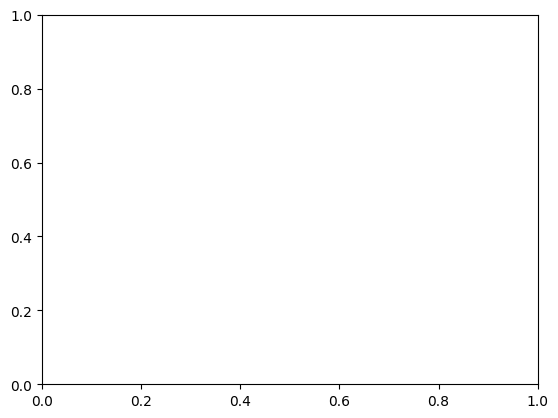

In [24]:
# Mass Combo plot
dim_n_obj_combs = [(2,5),(3,4),(4,3),(5,2)]
shift_dim = True
for solver in ["GDE3", "NSGAII","IBEA", "MOEAD", "diverse_tree"]:
    for tree in ["breadth", "depth"]:
        filtered_dfs = []
        for dim_n_obj_comb in dim_n_obj_combs:
            dimension = dim_n_obj_comb[0]
            n_objectives = dim_n_obj_comb[1]
            filtered_dfs.append(
                new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)&(new_df["n_objectives"]==n_objectives)]
            )
        filtered_df = pd.concat(filtered_dfs)
        if solver == "MOEAD":
            solver_name = "MOEA/D"
        elif solver == "NSGAII":
            solver_name = "NSGA-II"
        else:
            solver_name = solver

        fig, axs = plt.subplots(1, 4, figsize=(12, 3),dpi=600)
        fig.suptitle(f"Distribution of {solver_name}'s sampling points under {tree} tree $\operatorname{{dim}}X={dimension + n_objectives - 1}$",fontsize=18)
        fig.tight_layout(pad=2,w_pad=4,h_pad=5)
        width = 0.6
        colors = ["#8fdea0","#ec80b4", "#eed5a4","#9a97dc","#d7e7f5"]
        palette = sns.color_palette(colors)

        for n_objective, sub_df in filtered_df.groupby("n_objectives"):
            sub_results = []
            for sub_index, row in sub_df.iterrows():
                sub_results.append({"node_name": "root", "percentage": row["root"]})
                sub_results.append({"node_name": "1", "percentage": row["node_1"]})
                sub_results.append({"node_name": "2", "percentage": row["node_2"]})
                sub_results.append({"node_name": "3", "percentage": row["node_3"]})
                sub_results.append({"node_name": "4", "percentage": row["node_4"]})
            sub_results = pd.DataFrame(sub_results)
            plt.subplot(1,4,n_objective-1)
            plt.title(f"N objectives = {n_objective}", fontsize=16)
            # pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
            # axs[plot_row,plot_col].set_xlabel("Basin name")
            # axs[plot_row,plot_col].set_ylabel("Percentage of solver instances")
            # axs[plot_row,plot_col].set_ylim([-5, 105])

            plt.ylim([-5,105])
            # plt.grid(visible=False)
            pt.RainCloud(data=sub_results, x="node_name", y="percentage", orient="v", width_viol=0.9,linewidth=0.1,point_size=3,
                    rain_edgecolor='black', rain_linewidth=0.5, rain_alpha=1,move = 0.15,width_box=0,box_linewidth=0,offset=-0.0,pointplot=True, point_linestyles='', point_scale=0.3, palette=palette)
            plt.xlabel("Basin ID", fontsize=16)
            plt.ylabel("Percentage (%)", fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
        plt.savefig(f"../utils/mass_combo/mass_{solver}_{tree}_comb-dim{dimension + n_objectives - 1}_{'_shifted' if shift_dim else ''}.pdf", format="pdf", bbox_inches="tight")
        plt.savefig(f"../utils/mass_combo/mass_{solver}_{tree}_comb-dim{dimension + n_objectives - 1}_{'_shifted' if shift_dim else ''}.png")
        plt.close('all')  # Closes all open figures
        plt.clf()  # Clears the current figure (if one exists)
        plt.cla()  # Clears the current axes (if any exist)